In [2]:
!pip install pyyaml roboflow ultralytics==8.0.196 --quiet
!pip install pandas
!pip install opencv-python
!pip install opencv-contrib-python

import os
import sys
import shutil
import yaml
import pandas as pd
from roboflow import Roboflow
from ultralytics import YOLO


#get custom functions to use
sys.path.append('../')
from myutils import track_droplet
from plot_utils import add_speed, plot_speed

# Create Particle Detection Dataset with Roboflow

1. One convenient way of creating an object detection dataset is [Roboflow](https://roboflow.com/). Here is a short [tutorial](https://youtu.be/a3SBRtILjPI). If this is your first time doing this, please do not proceed without watching the tutorials.

2. Drag and drop your experiment video into Roboflow and start annotating. Generally speaking, 80-100 frames should be enough based on your experience.

3. We only have one object class 'droplet'. So create bounding boxes around the particle of interests. *Note that our model works only with a single particle entity.* In this case, walking droplets or granular intruders.

4. We already created a public dataset for a walking droplet experiment having 3 walkers in it. You can export it from Roboflow and introduce to your worksapce as follows. The procedure will be exactly the same if you use your own data with different API keys and project name etc.

In [4]:
!pip install roboflow

rf = Roboflow(api_key="WW6dCyTFMI8b51n0TdS7")
project = rf.workspace("droplets-hx0xu").project("walkers-eyx4s")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to walkers-1 in yolov8:: 100%|██████████████████████| 373/373 [00:00<00:00, 2870.40it/s]


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="z3NT339FFo3rfGNDBYI5")
project = rf.workspace("walkingdroplets").project("walkingdroplets")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to WalkingDroplets-1 in yolov8:: 100%|██████████| 182/182 [00:00<00:00, 3362.21it/s]


**READ CAREFULLY**: 
- The code snippet above will download a folder named "walkers-1" in which we have annotated images as well as a "data.yaml" file pointing to necessary folders. 
- However, there is a small bug in YOLOv8 such that annotations must be in the folder named *"datasets"* and thus the path to "data.yaml" must be modified. - - 

- Please run the following function by providing the original folder name. This will modify your folder accordingly. Run this function only once.

In [3]:
def modify_yaml(project_name):
    #pip install pyyaml
    import yaml
    import os


    # Step 1: Rename the folder
    new_folder_name = "datasets"
    
    # Check if the 'walkers' folder exists. If not, exit.
    if not os.path.exists(project_name):
        print(f"no folder named '{project_name}', please check the folder name downloaded from Roboflow ")
        exit()
    
    
    #Remove the 'datasets' folder if it exists
    if os.path.exists(new_folder_name):
        shutil.rmtree(new_folder_name)

    if os.path.exists(project_name):
        os.rename(project_name, new_folder_name)

    # Step 2: Modify the data.yaml file
    yaml_file_path = os.path.join(new_folder_name, "data.yaml")

    # Read the YAML data
    with open(yaml_file_path, 'r') as file:
        data = yaml.safe_load(file)

    # Modify the YAML data
    data["path"] = os.path.abspath(new_folder_name)  # add full path
    data["test"] = "test/images"
    data["train"] = "train/images"
    data["val"] = "valid/images"

    # Write the modified data back to the YAML file
    with open(yaml_file_path, 'w') as file:
        yaml.dump(data, file)
    
#change the project name(folder name) accordingly. this is the original folder dowloaded by the code snippet above.    
modify_yaml("WalkingDroplets-1")

# Traning YOLOv8

## I **dont** have a local GPU

- If you dont have a local GPU, the training procedure takes too long. In this case, we will train the model on Google Colab. And download the best model into "tutorial" folder we are working in.

- We createad a notebook on Colab, please **[click here](https://drive.google.com/file/d/1C1Oso_4lpQYy9qzhgaJHyEm_xe9nck40/view?usp=sharing)** to access. It will walk through the process, it is very simple.

## I **do** have a local GPU

- The following option for model training is self-explanatory. We will save all the YOLO tranining results into *"project/name"* folder. In the same folder, you will find tons of useful information. The ones we will definetely use is /weights/best.pt' which is the best model of our tranining. We will load and use the best model in the rest of the notebook. 


- You can experiment with different pretrained models; yolov8n, yolov8s, yolov8m, yolov8l, yolov8x(increasing in size )

In [3]:
#main yaml directory
data = 'datasets/data.yaml'

#save all yolo results here
yolo_results = 'yolo_results'

#save tranining results to yolo_results/experiment_name
experiment_name = "sample_project"

#overwrite the traning results for different trials
exist_ok = True

#number of epochs
epochs = 200

#reproducibility
seed = 0

In [5]:
#load and train the model
model = YOLO('yolov8n.yaml')
model = YOLO('yolov8n.pt') 

model.train(data=data, epochs=epochs,project=yolo_results,name=experiment_name,exist_ok=exist_ok)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002A7CBA80800>
fitness: 0.6952937766444526
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.66199])
names: {0: 'droplet'}
plot: True
results_dict: {'metrics/precision(B)': 0.9932387432337376, 'metrics/recall(B)': 1.0, 'metrics/mAP50(B)': 0.995, 'metrics/mAP50-95(B)': 0.6619930851605028, 'fitness': 0.6952937766444526}
save_dir: WindowsPath('yolo_results/sample_project')
speed: {'preprocess': 7.516720715691061, 'inference': 68.3580566855038, 'loss': 0.0, 'postprocess': 0.919033499325023}

- **If *mAP50* value on testing data is way below 0.90, that means the model did not learn enough thus will likely to fail in real-time tracker. Based on our experience, first start by increasing the the number of epochs to a high number say 400. If the behaviour is the same, increasing the number of training images may help. Add 20-30 images/labels to the training data. You can also increase the batch_size**. 

- Make sure to inspect the results in ""project/name" folder.

# Droplet/Intruder Tracking

- Once the model is trained, you will find the best model at  f"{project}/{name}/weights/best.pt" as noted above. **If you trained your model and download it from there, please change model_path accordingly**. 


To visualize and save the tracking results, simply modify the following cell. **track_droplet** displays the tracking in real-time and saves the trajectories to *save_dir/save_name.csv* which we will discuss in a bit. Ignore if you get "QObject::moveToThread" error. The same function also saves the tracking video in the same directory.


- Make sure to properly enter all the arguments. If you spot any false positives, try increasing the threshold slightly. You can always interrupt the simulation by pressing "q" on your keyboard. All information is saved in real-time.

In [4]:
model_path = f"{yolo_results}/{experiment_name}/weights/best.pt"
model = YOLO(model_path) 

In [8]:
#number of particles in the experiment
!pip install opencv-python
!pip install opencv-contrib-python
num_particle = 1

#experiment video to be tracked, defined at the top
video_path = r'C:\Users\henri\Documents\Deep-Learning-Tracking-Walking-Droplets-main\41567_2017_3_MOESM1_ESM.mp4'

#accept detections only above this confidance
conf_thresold = 0.45

#save tracks and tracking video here
save_dir = 'tracking_results'

#name your experiment
save_name = 'droplet2'

#show trajectory or just bounding box with IDs
show_trace = True

# #run the tracker
track_droplet(model=model, num_particle=num_particle, video_path=video_path, conf_thresold=conf_thresold, save_dir=save_dir, save_name=save_name, show_trace=show_trace)

experiment: droplet2 detection_rate: 1189/1200 = 99.083%
trajectories saved to tracking_results\droplet2.csv


(1189, 1200, 79.40201425552368)

                    experiment: sample_project detection_rate: 8909/9033 = 98.627%
                    trajectories saved to tracking_results/sample_project.csv

                    (8909, 9033, 185.93071365356445)

# Inspecting Results and Some Post-Processing

- Let's inspect the results regarding our original experiment.We will start by loading the dataframe we saved. You can analyze this data in a way you wish. 


- **frame_id, time, x, y, c** columns refers to the frame number, time stamp(sec), x-position,y-position of each individual droplet/intruder tracked. detected=1 means we detected precisely 3 particles(which is different in other experiments) in that frame with confidance score 0.45 we set above. This ensures we dont get false positives. detected=0 rows has only frame_id and time properties. It can be useful for diagnosis purposes. 


- For example, using the plot function below, we can overlay the position and the flow of the object.

In [6]:
data = pd.read_csv(f"tracking_results/droplet2.csv")
data.head()

,frame_id,time,detected,x1,y1,c1
0,1.0,0.000000,1.0,276.201050,102.984001,0.473411
1,2.0,0.055556,0.0,NaN,NaN,NaN
2,3.0,0.111111,1.0,291.241547,106.362839,0.569022
3,4.0,0.166667,1.0,300.460999,108.932266,0.537417
4,5.0,0.222222,1.0,308.099915,113.235855,0.642799


In [7]:
df_with_speed = add_speed(data=data,num_particle=1)
df_with_speed.head()

,frame_id,time,detected,x1,y1,c1,dx1,dy1,speed1
0,1.0,0.000000,1.0,276.201050,102.984001,0.473411,0.000000,0.000000,0.000000
2,3.0,0.111111,1.0,291.241547,106.362839,0.569022,135.364471,30.409538,138.738171
3,4.0,0.166667,1.0,300.460999,108.932266,0.537417,165.950134,46.249695,172.274436
4,5.0,0.222222,1.0,308.099915,113.235855,0.642799,137.500488,77.464600,157.819988
5,6.0,0.277778,1.0,315.973877,118.171753,0.534755,141.731323,88.846161,167.276443


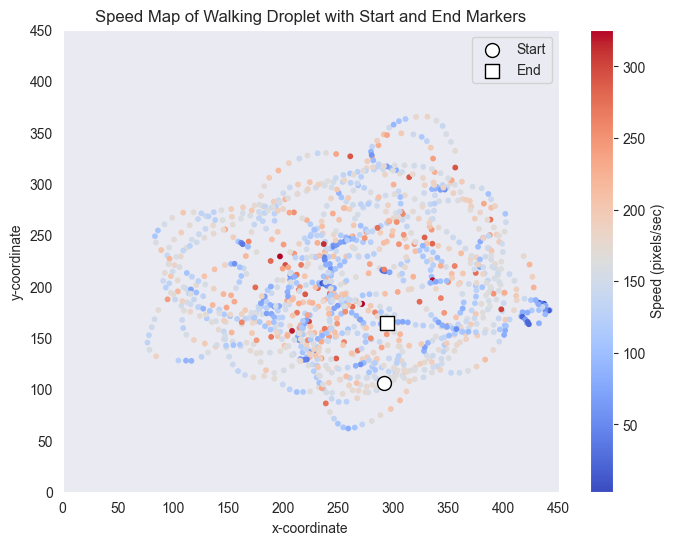

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'tracking_results/droplet2.csv'
data = pd.read_csv(file_path)

# Filter data where the droplet was detected
filtered_data = data[data['detected'] == True]

# Extract necessary columns
time = filtered_data['time'].values
x1 = filtered_data['x1'].values
y1 = filtered_data['y1'].values

# Calculate the distance moved between consecutive points
distance = np.sqrt(np.diff(x1)**2 + np.diff(y1)**2)

# Calculate time intervals
time_intervals = np.diff(time)

# Calculate speed (distance / time)
speed = distance / time_intervals

# Plotting the speed map with start and end markers
plt.figure(figsize=(8, 6))
sc = plt.scatter(x1[1:], y1[1:], c=speed, cmap='coolwarm', s=10)
plt.xlim(0,450)
plt.ylim(0,450)

# Adding a circle marker for the start point
plt.scatter(x1[1], y1[1], color='white', s=100, edgecolor='black', marker='o', label='Start')

# Adding a square marker for the end point
plt.scatter(x1[-1], y1[-1], color='white', s=100, edgecolor='black', marker='s', label='End')

plt.colorbar(sc, label='Speed (pixels/sec)')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.title('Speed Map of Walking Droplet with Start and End Markers')
plt.legend()
plt.grid(False)
plt.savefig("plot1.png")
plt.show()

#

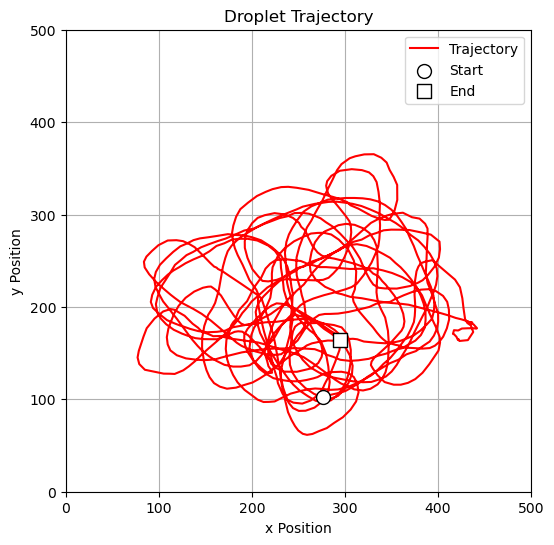

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'tracking_results/droplet2.csv'
data = pd.read_csv(file_path)

# Filter data where the droplet was detected
filtered_data = data[data['detected'] == True]

# Extract necessary columns
time = filtered_data['time'].values
x1 = filtered_data['x1'].values
y1 = filtered_data['y1'].values

# Calculate the distance moved between consecutive points
distance = np.sqrt(np.diff(x1)**2 + np.diff(y1)**2)

# Calculate time intervals
time_intervals = np.diff(time)


#Create an plot of the trajectory the x and y limited to 0,450
plt.figure(figsize=(6, 6))
plt.plot(x1,y1,color="red", linestyle='solid', label="Trajectory")
plt.xlim(0,500)
plt.ylim(0,500)

#Add an white circle in the beguining of the trajectory
plt.scatter(x1[0],y1[0], color="White", edgecolor='black', marker='o', label='Start', s=100, zorder=5)
#Add and white square in the end of the trajectory
plt.scatter(x1[-1], y1[-1], color="White", edgecolor='black', marker='s', label='End', s=100, zorder=5)

plt.xlabel('x Position')
plt.ylabel('y Position')
plt.title('Droplet Trajectory')
plt.legend()
plt.grid(True)
plt.savefig("plot2.png")
plt.show()

## Use Different Trackers with YOLOv8

- Any tracking-by-detection method can operate on YOLOv8 detection. [yolov8_tracker](https://github.com/mikel-brostrom/yolov8_tracking) by mikel-brostrom is an amazing tool to directly obtain the tracks from SOTA trackers on top of YOLOv8. As fas as I can see, 'strongsort', 'deepocsort', 'ocsort', 'bytetrack' and 'botsort' are supported there. Following is a simple implemantation. You can experiment with different tracker. 


- As we discussed in our paper, **these models suffer from multiple ID switches in all multiple droplet experiments. Thus, their results cannot be used by any means for multiple walking droplet experiments**. However, they can be useful for single particle tracking or some other experiments. It is not a good practice to run the command line arguments from Jupyter but this is just a demo. 

- Restart the notebook if you encounter any error in the following cell. This library appears to have some compatibility issues.

In [ ]:
# List of tracking methods ['strongsort', 'deepocsort', 'ocsort', 'bytetrack', 'botsort']
tracking_method = 'strongsort'

# Root directory for all tutorial data
track_dir = 'sota_tracker'

# Accept detections above this
conf_thresold = 0.45

#experiment name
exp_name = 'strongsort_track'

video_path = video_path

os.system(f"python ../yolov8_tracking/track.py --yolo-weights {model_path} --tracking-method {tracking_method}\
          --source {video_path} --conf-thres {conf_thresold} \
          --project {track_dir} --name {exp_name} \
          --show-vid --save-txt --save-vid \
          ")


                                               THANK YOU FOR CHECKING OUT!